# Graph Mining

## 📚 Exercise 1
Complete the function `compute_modularity` to compute the modularity measure of a given graph.

### Goal:
1. Visualizing two graphs using `networkx` (the Karate Club graph is currently commented out in the code)
2. Completing `compute_modularity` function that aims to measure modularity of a given graph

### What you are learning in this exercise:
1. Getting familiar with `networkx` library.
2. Analyzing modularity measure for different graph inputs

#### Hint: you can install `networkx` package by running the following command in a  notebook cell: `!conda install networkx --yes `

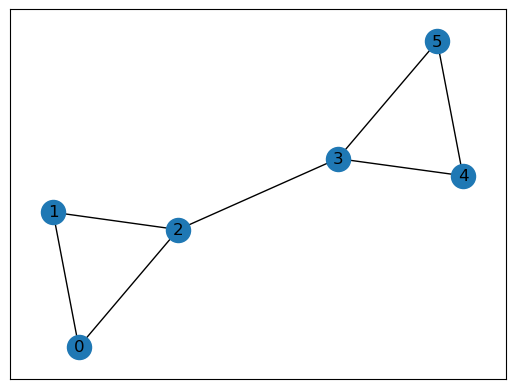

In [1]:
import networkx as nx
import numpy as np
%matplotlib inline

M = ["0,1,2",
"1,0,2",
"2,0,1,3",
"3,2,4,5",
"4,3,5",
"5,3,4"
    ]
G=nx.parse_adjlist(M, nodetype=int, delimiter=",")
nx.draw_networkx(G)

#G = nx.karate_club_graph()
#nx.draw_networkx(G)

In [6]:
for node in [0,1,2]:
    G.nodes[node]['community'] = 0
for node in [3,4,5]:
    G.nodes[node]['community'] = 1
len(G.edges)

7

In [7]:
# The community label of a node can be accessed by G[node_id]['community']
# The degree of a node: G.degree[node_id]
# The neighbors of a node: G.neighbors(node_id)
# Number of edges between 2 nodes: G.number_of_edges(node_1, node_2)
def compute_modularity(G, nodes_community):
    ''' input: G:nx.Graph 
               nodes_community:{node_id:community_id}
       output: Q (modularity metric)
    '''
    Q = 0
    
    m = len(G.edges)
    for node_i in G.nodes:
        for node_j in G.nodes:
            if nodes_community[node_i] == nodes_community[node_j]:
                Q += G.number_of_edges(node_i, node_j) - G.degree[node_i]*G.degree[node_j]/(2*m)
    Q = Q/(2*m)

    return Q 

In [8]:
nodes_community = {}
for node in G.nodes():
    nodes_community[node] = G.nodes[node]['community']
Q = compute_modularity(G, nodes_community)
print(Q)

0.3571428571428571


## 📚 Exercise 2
Suppose that you have an undirected social graph G = (U, V), where U - set of nodes, V - set of edges.

<img src="graph.png" width="400">

Compute betweenness for the graph G and output the communities for the following betweenness threshold : 4, 6.

In [9]:
['A, B, C', 'C, A, B', 'B, C, A, D', 'D, B, G, E, F', 'G, D, F', 'F, G, D, E', 'E, F, D']

['A, B, C',
 'C, A, B',
 'B, C, A, D',
 'D, B, G, E, F',
 'G, D, F',
 'F, G, D, E',
 'E, F, D']

Girvan- Newman algorithm, first we visit each node X once and compute the number of shortest paths from X to each of the other nodes. To do so, we run BFS starting at node X.



Path counting: 

si on commence de E: 

path = 1 : F, D

path = 2 : G, B 

path = 3 : C, A


tous les nodes sont labélés de 1 sauf G car il a 2 parents --> 2 shortest paths alors que les autres en on que 1

flow counting: 

The flow that arrives at every node is 1.

In addition each node receives the flow of its children. 

The flow of its children is distributed over the parents, proportionally to the number of paths that are leading to those parents (previous stage). 

chaque node donne possède 1 et donc le donne à ses/son parents, si un seul parents --> donne 1, si 2 parents --> donne 0.5 

pour calculer, il faut donc simplement faire la somme de ce que la node reçoit de ses enfants et ajouter 1 (son score à elle)

node qui ont 1 en score (elles n'ont pas d'enfants): A et C 

B reçoit 1 de A et 1 de C et a 1 de base --> obtient 3 

D reçoit 1 de A, 1 de B et 1 de C et 0.5 de G et a 1 de base --> obtient 4.5

F reçoit 0.5 de G et a 1 de base --> obtient 1.5

E reçoit 4.5 (de D), 1.5 (de F) et a 1 de base --> obtient 7 

A : 1
C : 1 
B : 3 
D : 4.5 
E : 7 
F : 1.5 


maintenant je fais pareils mais pour chaque noeud comme si c'était le noeud de départ : 

F : 
A : 1 
C : 1
B : 3
D : 4.5 


<img src="graph.png" width="400">


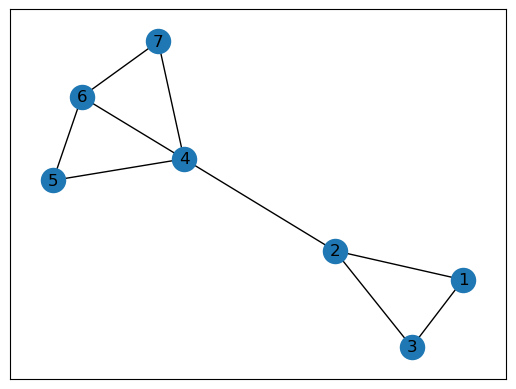

In [11]:
#      ['A, B, C', 'C, A, B', 'B, C, A, D', 'D, B, G, E, F', 'G, D, F', 'F, G, D, E', 'E, F, D']
este = ['1, 2, 3', '3, 1, 2', '2, 3, 1, 4', '4, 2, 7, 5, 6', '7, 4, 6', '6, 7, 4, 5', '5, 6, 4']
G=nx.parse_adjlist(este, nodetype=int, delimiter=",")
nx.draw_networkx(G)